# Data Visualizations - Food Delivery Analysis

In [1]:
# importing essential libraraies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting visual styles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize']=(12,6) #default plot size
print("Libraries loaded!")

Libraries loaded!


In [3]:
#Load the Dataset
try:
    df = pd.read_csv('final_food_delivery_dataset.csv')
    df['order_date'] = pd.to_datetime(df['order_date'])
    print("data loaded successfully!")
    print(f" shape: {df.shape}")
except FileNotFoundError:
    print("Error 'final_food_delivery_dataset.csv' not found")

data loaded successfully!
 shape: (10000, 12)


## Aggregate Revenue by Month

<function matplotlib.pyplot.show(close=None, block=None)>

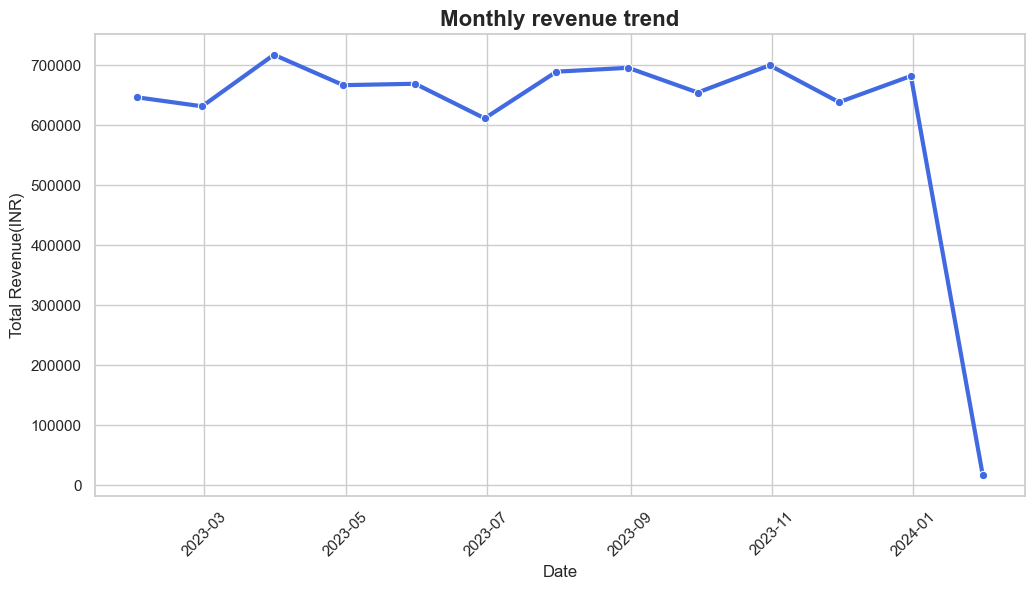

In [5]:
monthly_revenue = df.set_index('order_date').resample('ME')['total_amount'].sum().reset_index()

#plot
plt.figure(figsize = (12,6))
sns.lineplot(data = monthly_revenue, x='order_date', y='total_amount', marker = 'o', color = 'royalblue', linewidth = 3)
plt.title('Monthly revenue trend', fontsize = 16, fontweight = 'bold')
plt.xlabel('Date', fontsize =12)
plt.ylabel('Total Revenue(INR)', fontsize=12)
plt.xticks(rotation=45)
plt.show

## Aggregate Revenue by City

C:\Users\Zaara\AppData\Local\Temp\ipykernel_21604\163272391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=city_revenue, x='city', y='total_amount', palette='viridis')


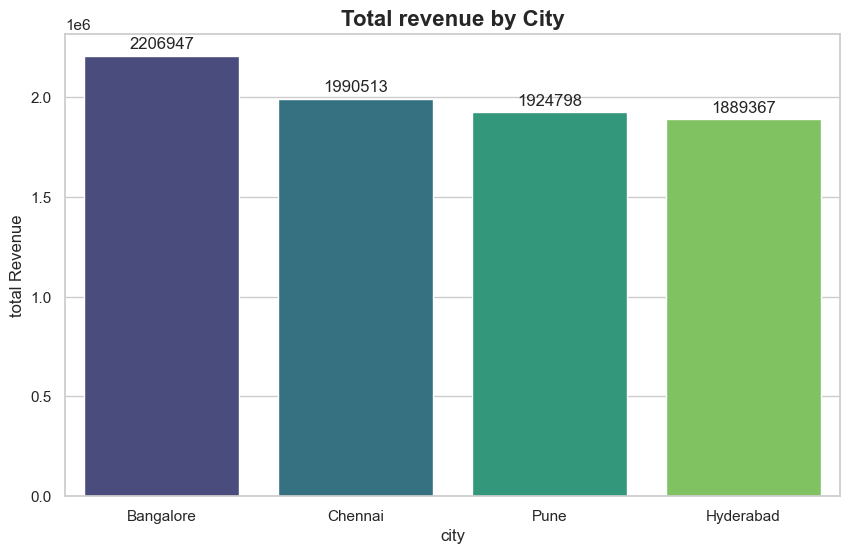

In [8]:
city_revenue = df.groupby('city')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending = False)
#plot
plt.figure(figsize=(10,6))
ax = sns.barplot(data=city_revenue, x='city', y='total_amount', palette='viridis')

#labels on top of bars
for i in ax.containers:
    ax.bar_label(i,fmt='%.0f',padding=3)
plt.title('Total revenue by City', fontsize = 16, fontweight = 'bold')
plt.xlabel('city', fontsize=12)
plt.ylabel('total Revenue', fontsize = 12)
plt.show()

## Membership Value

C:\Users\Zaara\AppData\Local\Temp\ipykernel_21604\956470603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'membership', y='total_amount', palette='Set3')


<function matplotlib.pyplot.show(close=None, block=None)>

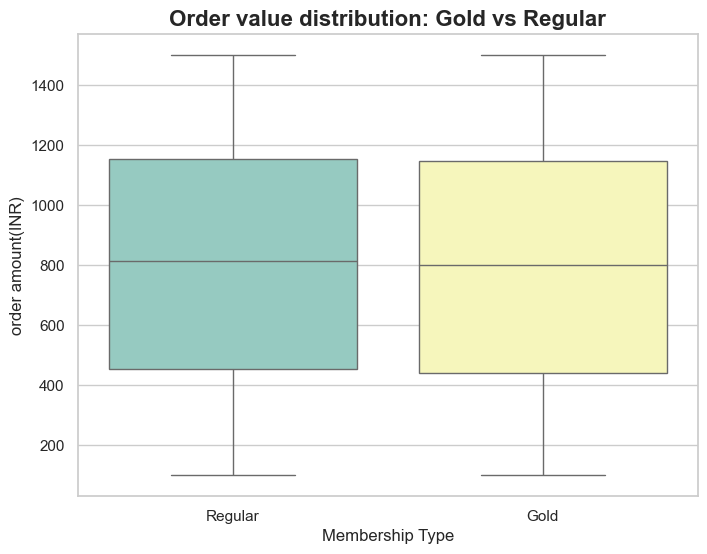

In [9]:
plt.figure(figsize=(8,6))

# boxplot showing median, quartiles, outlier
sns.boxplot(data = df, x = 'membership', y='total_amount', palette='Set3')
plt.title('Order value distribution: Gold vs Regular', fontsize=16, fontweight='bold')
plt.xlabel('Membership Type', fontsize=12)
plt.ylabel('order amount(INR)', fontsize=12)
plt.show

## Cuisine performace heatmap

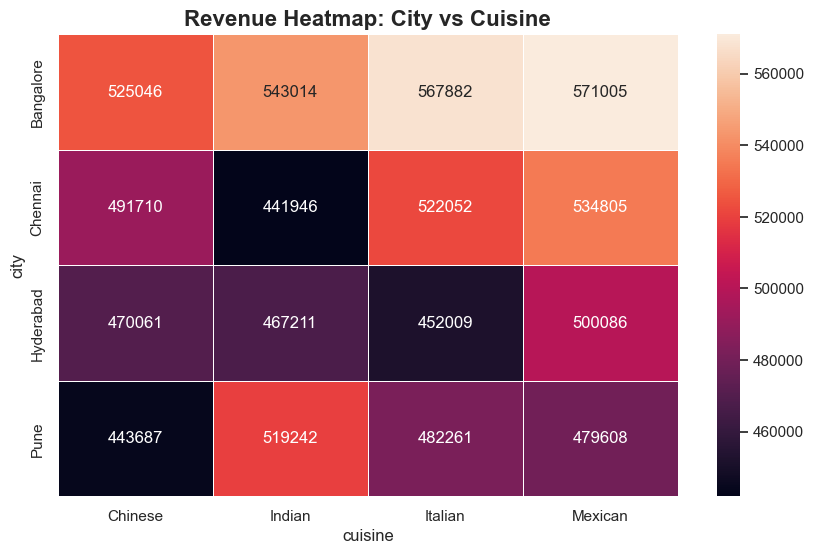

In [11]:
pivot = df.pivot_table(index='city',columns='cuisine', values='total_amount', aggfunc = 'sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True,
           fmt='.0f',
           linewidth = 0.5)
plt.title('Revenue Heatmap: City vs Cuisine', fontsize=16, fontweight='bold')
plt.xlabel('cuisine')
plt.ylabel('city')
plt.show()